Extracts defining key features from an input image (using ideas from corner, edge, and contour detection)

Then using a distance calculation, finds all the matches in a secondary image

3 Methods included in this notebook:
1. Brute-Force matching with ORB Descriptors
2. Brute-Force matching with SIFT Descriptors and Ratio Test
3. FLANN based Matcher

In [1]:
!pip install opencv-contrib-python==3.4.2.16

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)

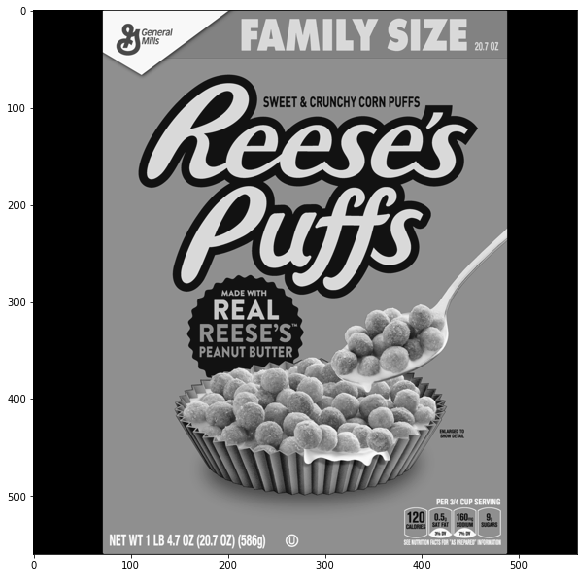

In [5]:
display(reeses)

In [6]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)

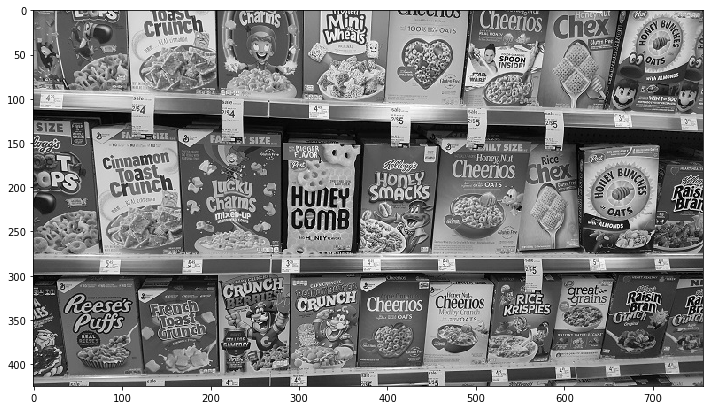

In [7]:
display(cereals)

#### Brute-Force using ORB Descriptors (Bad accuracy)

In [8]:
orb = cv2.ORB_create()

In [9]:
keypoint1, descriptor1 = orb.detectAndCompute(reeses, None)
keypoint2, descriptor2 = orb.detectAndCompute(cereals, None)

In [10]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [11]:
matches = brute_force.match(descriptor1, descriptor2)

In [12]:
single_match = matches[0]

In [13]:
single_match.distance

78.0

In [14]:
len(matches)

263

In [15]:
matches = sorted(matches, key=lambda x:x.distance)

In [16]:
reeses_matches = cv2.drawMatches(reeses, keypoint1, cereals, keypoint2, matches[:25], None, flags=2)

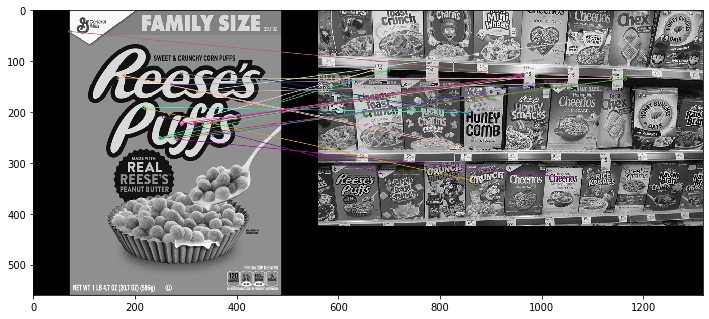

In [17]:
display(reeses_matches)

#### Brute Force using SIFT descriptors

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

In [19]:
keypoint1, descriptor1 = sift.detectAndCompute(reeses, None)
keypoint2, descriptor2 = sift.detectAndCompute(cereals, None)

In [20]:
brute_force = cv2.BFMatcher()

In [21]:
matches = brute_force.knnMatch(descriptor1, descriptor2, k=2)

In [22]:
good = []

#Less Distance == Better match
#Ratio match1 < 75% match2 
for match1, match2 in matches:
    #If match 1 distance is less than 75% of match 2 ditance
    #then descriptor was a good match, we will keep it
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [23]:
len(good)

78

In [24]:
len(matches)

1500

In [25]:
sift_matches = cv2.drawMatchesKnn(reeses, keypoint1, cereals, keypoint2, good, None, flags=2)

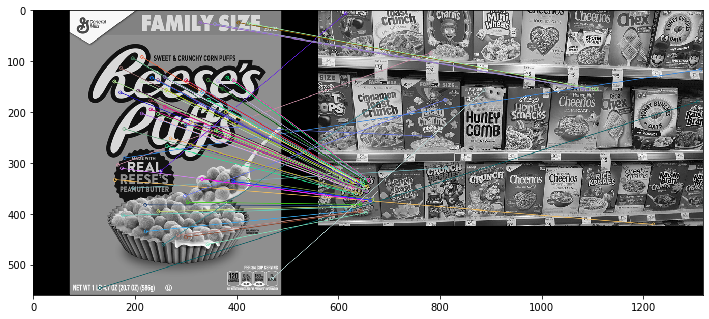

In [26]:
display(sift_matches)

#### FLANN Based Matcher

In [27]:
sift = cv2.xfeatures2d.SIFT_create()

In [28]:
keypoint1, descriptor1 = sift.detectAndCompute(reeses, None)
keypoint2, descriptor2 = sift.detectAndCompute(cereals, None)

In [29]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [30]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [31]:
matches = flann.knnMatch(descriptor1, descriptor2, k=2)

In [32]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

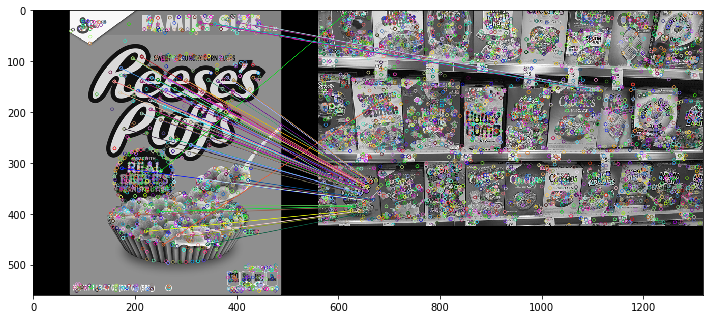

In [33]:
flann_matches = cv2.drawMatchesKnn(reeses, keypoint1, cereals, keypoint2, good, None, flags = 0)
display(flann_matches)

In [34]:
matchesMask = [[0,0] for i in range(len(matches))]

In [35]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1, 0]

In [36]:
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask = matchesMask, flags = 0)

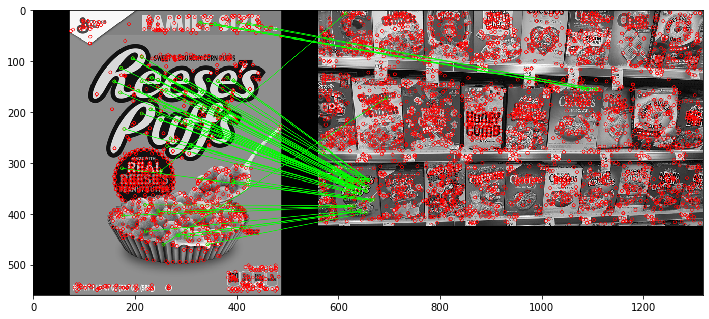

In [37]:
flann_matches = cv2.drawMatchesKnn(reeses, keypoint1, cereals, keypoint2, matches, None, **draw_params)
display(flann_matches)